In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset

# Load the Excel file
excel_file_path = '/Users/karldavis/Desktop/LAEI2013_MajorRoads_EmissionsbyLink_2013.xlsx'  # Replace with the path to your Excel file

# Read the sheets into DataFrames
df1 = pd.read_excel(excel_file_path, sheet_name='2013 LTS Rds')
df2 = pd.read_excel(excel_file_path, sheet_name='2013 Other Major Rds')

# Concatenate the DataFrames vertically
data = pd.concat([df1, df2], ignore_index=True)

# save the combined DataFrame to a new CSV file
data.to_csv('combined_csv_file.csv', index=False)



/Users/karldavis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/karldavis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/karldavis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/karldavis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

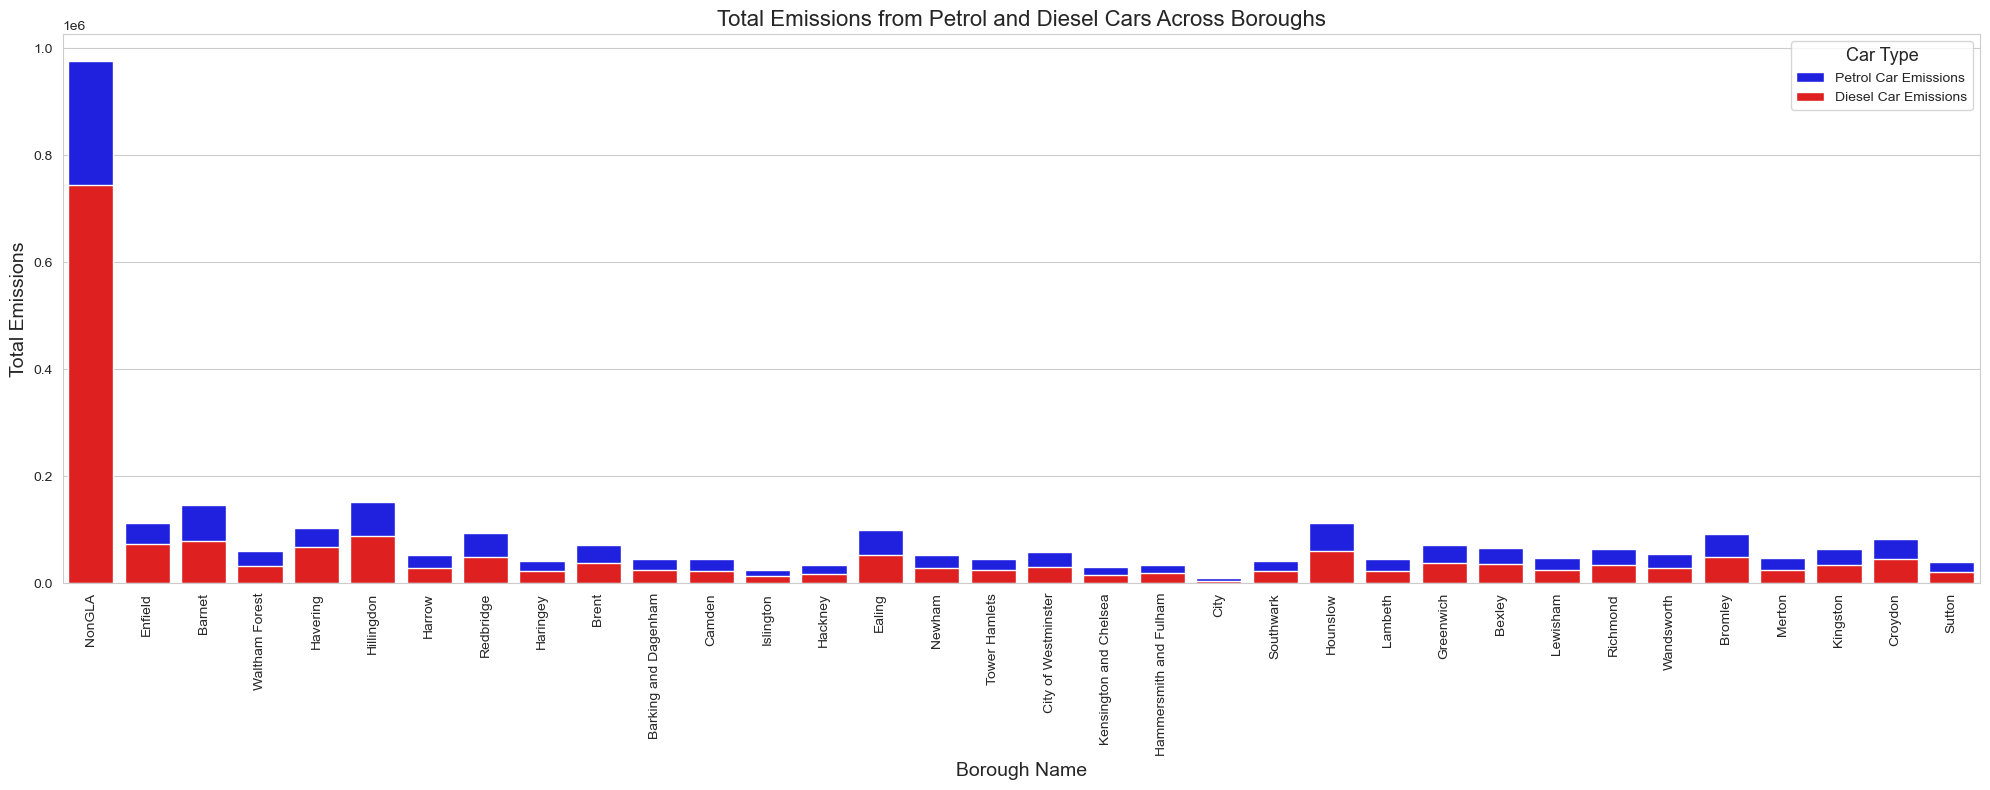

In [2]:
# Visualizing the Data
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))
sns.barplot(x="BoroughName_ExactCut", y="PetrolCar", data=data,
            estimator=sum, errorbar=None, color="b", label="Petrol Car Emissions")
sns.barplot(x="BoroughName_ExactCut", y="DieselCar", data=data,
            estimator=sum, errorbar=None, color="r", label="Diesel Car Emissions")
plt.title("Total Emissions from Petrol and Diesel Cars Across Boroughs", fontsize=16)
plt.xlabel("Borough Name", fontsize=14)
plt.ylabel("Total Emissions", fontsize=14)
plt.xticks(rotation=90)
plt.legend(title="Car Type", title_fontsize='13', loc='upper right')
plt.tight_layout()
plt.show()

# Assumed growth rates
population_growth_rate = 0.01
car_sales_growth_rate = 0.01
years_into_future = 7



In [3]:
# Calculating Future Emissions
data['FuturePetrolCarEmissions'] = (data['PetrolCar'] *
                                    ((1 + population_growth_rate + car_sales_growth_rate) ** years_into_future))
data['FutureDieselCarEmissions'] = (data['DieselCar'] *
                                    ((1 + population_growth_rate + car_sales_growth_rate) ** years_into_future))

# Creating a simplified dataset
simplified_data = data.groupby('BoroughName_ExactCut')[
    ['PetrolCar', 'DieselCar', 'FuturePetrolCarEmissions', 'FutureDieselCarEmissions']].sum().reset_index()
simplified_data['PopulationGrowthRate'] = population_growth_rate
simplified_data['CarSalesGrowthRate'] = car_sales_growth_rate

# Splitting data into features and targets
X = simplified_data[['PetrolCar', 'DieselCar', 'PopulationGrowthRate', 'CarSalesGrowthRate']]
y_petrol = simplified_data['FuturePetrolCarEmissions']
y_diesel = simplified_data['FutureDieselCarEmissions']

# Splitting data into training and testing sets
X_train_petrol, X_test_petrol, y_train_petrol, y_test_petrol = (
    train_test_split(X, y_petrol, test_size=0.2, random_state=42))
X_train_diesel, X_test_diesel, y_train_diesel, y_test_diesel = (
    train_test_split(X, y_diesel, test_size=0.2, random_state=42))

# Model Initialization and Training
model_petrol = LinearRegression().fit(X_train_petrol, y_train_petrol)
model_diesel = LinearRegression().fit(X_train_diesel, y_train_diesel)

# Predictions
predictions_petrol = model_petrol.predict(X_test_petrol)
predictions_diesel = model_diesel.predict(X_test_diesel)



In [4]:
# Evaluation
mae_petrol = mean_absolute_error(y_test_petrol, predictions_petrol)
mse_petrol = mean_squared_error(y_test_petrol, predictions_petrol)
r2_petrol = r2_score(y_test_petrol, predictions_petrol)

mae_diesel = mean_absolute_error(y_test_diesel, predictions_diesel)
mse_diesel = mean_squared_error(y_test_diesel, predictions_diesel)
r2_diesel = r2_score(y_test_diesel, predictions_diesel)

# Print Evaluation Metrics
print("Petrol Car Emissions Model: MAE =", mae_petrol, ", MSE =", mse_petrol, ", R2 =", r2_petrol)
print("Diesel Car Emissions Model: MAE =", mae_diesel, ", MSE =", mse_diesel, ", R2 =", r2_diesel)

Petrol Car Emissions Model: MAE = 4.7813435750348226e-11 , MSE = 8.016561822228199e-21 , R2 = 1.0
Diesel Car Emissions Model: MAE = 9.328817083899464e-11 , MSE = 4.855172055977677e-20 , R2 = 1.0
